<a href="https://colab.research.google.com/github/shrisha337-beep/Library-Slip-Tracker/blob/main/Library_slip_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Installing Dependencies

In [12]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Step 1: Installing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler # Corrected import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Corrected import
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step 2: Generate Synthetic DataSet (500 entries)

In [30]:
#SetUp
np.random.seed(42)
student = ['Raghav Singh','Rahul Sharma','Anjali Khanna','Khushi Mukhija','Shreeja Chaturvedi','Megha Jain','Kunal Mehta','Ananya Shroff','Karan Ahuja','Sneha Kapoor',
                 'Rohit Kashyap','Megha Jain','Vivek Agrawal','Isha Khanna','Aman Verma','Priya Desai','Shreya Sharma']
books = ['Introduction to ML','Python Basics','Data Science with Python','Modern Web-Dev','Operating Systems','Linear Algebra','Digital Circutis',
                'Database Systems','Advanced Machine Learning','Artificial Intelligence','Electronic Circuits']
departments = ['CS','Math','Electronics','AI','Web Dev']
librarians = ['Mrs. Batra','Mr. Khurana','Ms. Sheikh','Mrs. Kapoor','Mr. Ahuja']

#Settings
n = 500
fine_per_day = 1
start_date = datetime(2025,1,1)

#17 offsets from -2 to 14
return_offsets = list(range(-2,15))
#17 probabilities matching above
probabilities = np.array([0.03, 0.03, 0.06, 0.06, 0.06, 0.06, 0.06,
                          0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                          0.05, 0.05, 0.05])
#Normalize to sum to 1.0
probabilities = probabilities/probabilities.sum()

#Generate Data
data = []
for i in range(n):
    slip_id = f"SLIP{i+1:05d}"
    student = random.choice(student)
    book = random.choice(books)
    department = random.choice(departments)
    librarian = random.choice(librarians)

    issue_date = start_date + timedelta(days=random.randint(0,365))
    due_date = issue_date + timedelta(days=14) # Due date should be relative to issue date
    return_offset = random.choices(return_offsets, weights=probabilities, k=1)[0]
    return_date = due_date + timedelta(days=int(return_offset)) # Calculate return_date relative to due_date

    delay_days = max(0,(return_date - due_date).days)
    fine_amount = delay_days * fine_per_day

    data.append([slip_id, student, book, department, librarian, issue_date, due_date, return_date, delay_days, fine_amount])

# Create and Save Dataframe
columns = ['Slip_Id','Student','Book','Department','Librarian','Issue_Date','Due_Date','Return_Date','Delay_Days','Fine']
df = pd.DataFrame(data,columns=columns)
df.to_csv('library_slip_tracker.csv',index=False)
print("Synthetic dataset generated and saved as 'library_slip_tracker.csv")

Synthetic dataset generated and saved as 'library_slip_tracker.csv


Step 3: Loading DataSet (either uploaded by user or use the generated one)

In [19]:
from google.colab import files
import io
import pandas as pd

print("Please upload your own dataset or press cancel to use generated one")
uploaded = files.upload()
if uploaded:
  for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
else:
  print("No file uploaded, using generated DataSet:")
  # Read the generated CSV directly from the file system
  df = pd.read_csv('library_slip_tracker.csv')

Please upload your own dataset or press cancel to use generated one


No file uploaded, using generated DataSet:


Step 4: Preprocessing the Data

In [22]:
print("\n Data Preprocessing")

#Encode categorical columns
label_encoders = {}
categorical_cols = ['Student','Book','Department','Librarian']
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])

#Convert dates to numeric (days since earliest date)
date_cols = ['Issue_Date','Due_Date','Return_Date']
for col in date_cols:
  df[col] = pd.to_datetime(df[col])
  df[col] = (df[col] - df[col].min()).dt.days

#Feature and Target
X = df.drop(columns=['Slip_Id','Fine']) #Drop slip ID and fine from features
Y = (df['Delay_Days']>0).astype(int) #Target: 1 if returned late, otherwise 0

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Data Preprocessing


Step 5: Train-Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

Step 6: Model Training

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)


RandomForestClassifier(random_state=42)

Step 7: Predictions and Evaluation


Accuracy: 1.0

Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


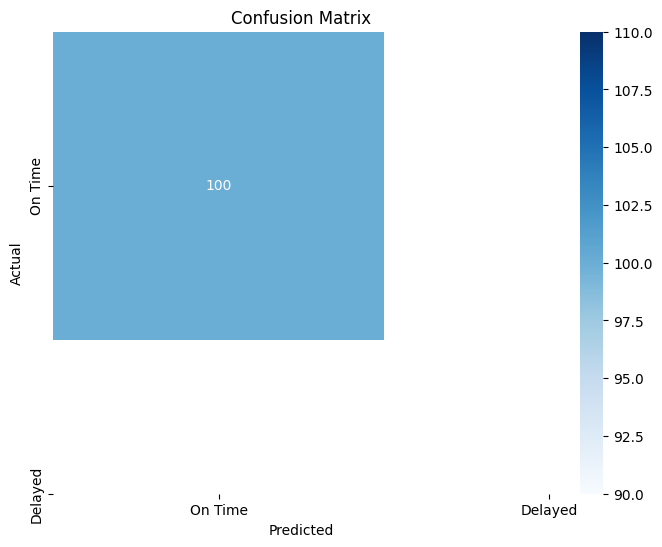


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)
class_report = classification_report(Y_test,y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed']) # Corrected ytickables to yticklabels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

Step 8: Heatmap of Feature Correlations

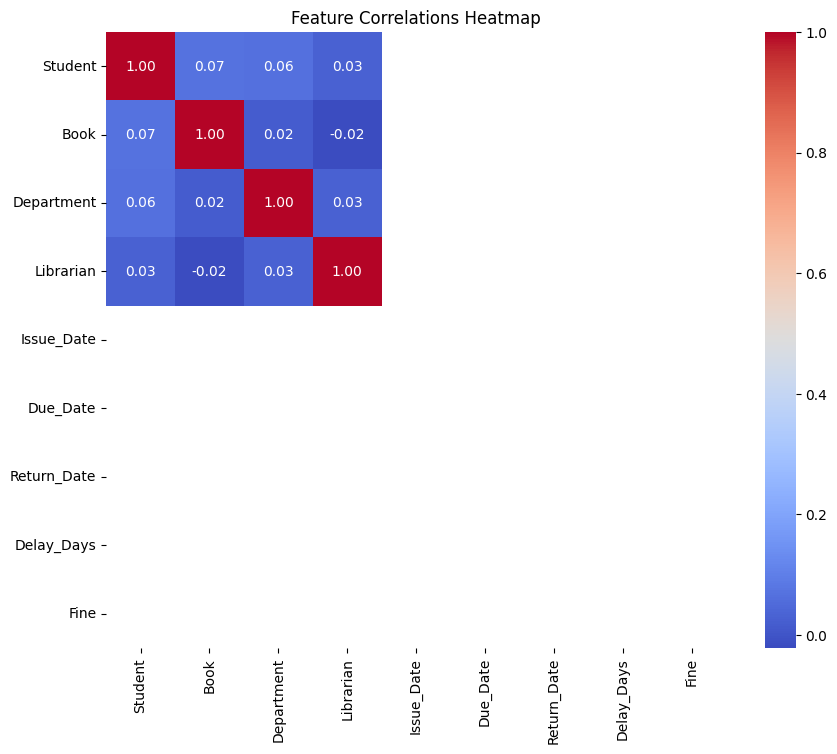

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=['Slip_Id']).corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlations Heatmap")
plt.show()

Step 9: Feature Importance


/tmp/ipython-input-3198483856.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')


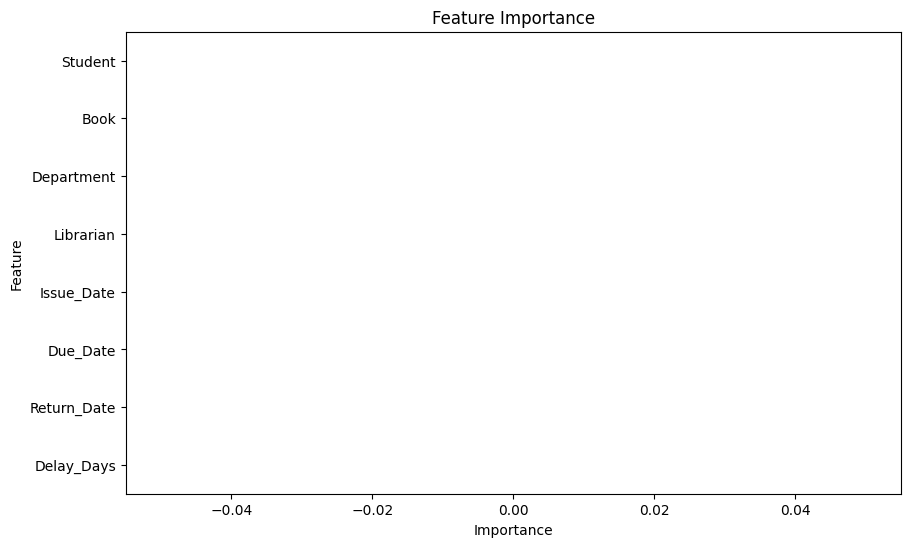

In [29]:
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')
plt.title("Feature Importance")
plt.show()

Step 3: Loading DataSet (either uploaded by user or use the generated one)

In [38]:
from google.colab import files
import io
import pandas as pd

print("Please upload your own dataset or press cancel to use generated one")
uploaded = files.upload()
if uploaded:
  for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
else:
  print("No file uploaded, using generated DataSet:")
  # Read the generated CSV directly from the file system
  df = pd.read_csv('library_slip_tracker.csv')

display(df.head())

Please upload your own dataset or press cancel to use generated one


No file uploaded, using generated DataSet:


,Slip_Id,Student,Book,Department,Librarian,Issue_Date,Due_Date,Return_Date,Delay_Days,Fine
0,SLIP00001,Megha Jain,Introduction to ML,Math,Mrs. Kapoor,2025-03-19,2025-04-02,2025-04-08,6,6
1,SLIP00002,J,Linear Algebra,Web Dev,Mr. Ahuja,2025-10-21,2025-11-04,2025-11-07,3,3
2,SLIP00003,J,Python Basics,AI,Ms. Sheikh,2025-12-05,2025-12-19,2025-12-29,10,10
3,SLIP00004,J,Introduction to ML,CS,Mr. Ahuja,2025-03-25,2025-04-08,2025-04-15,7,7
4,SLIP00005,J,Data Science with Python,Web Dev,Mr. Ahuja,2025-08-21,2025-09-04,2025-09-18,14,14


Step 4: Preprocessing the Data

In [32]:
print("\n Data Preprocessing")

#Encode categorical columns
label_encoders = {}
categorical_cols = ['Student','Book','Department','Librarian']
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])

#Convert dates to numeric (days since earliest date)
date_cols = ['Issue_Date','Due_Date','Return_Date']
for col in date_cols:
  df[col] = pd.to_datetime(df[col])
  df[col] = (df[col] - df[col].min()).dt.days

#Feature and Target
X = df.drop(columns=['Slip_Id','Fine']) #Drop slip ID and fine from features
Y = (df['Delay_Days']>0).astype(int) #Target: 1 if returned late, otherwise 0

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X_scaled)
display(Y)


 Data Preprocessing


array([[ 2.23383079e+01,  3.28089105e-01,  7.51217780e-01, ...,
        -1.12789443e+00, -1.12416006e+00,  7.05747321e-03],
       [-4.47661481e-02,  6.39960877e-01,  1.45592489e+00, ...,
         9.78569539e-01,  9.48284442e-01, -6.54580641e-01],
       [-4.47661481e-02,  1.57557619e+00, -1.36290355e+00, ...,
         1.41741620e+00,  1.45423333e+00,  8.89241625e-01],
       ...,
       [-4.47661481e-02,  9.51832650e-01, -1.36290355e+00, ...,
         1.02733028e+00,  9.96933374e-01, -6.54580641e-01],
       [-4.47661481e-02,  1.62173322e-02,  1.45592489e+00, ...,
        -1.63500612e+00, -1.58146002e+00,  1.10978766e+00],
       [-4.47661481e-02, -9.19397985e-01, -6.58196442e-01, ...,
        -3.18466145e-01, -2.38749499e-01,  1.77142578e+00]])

,Delay_Days
0,1
1,1
2,1
3,1
4,1
...,...
495,1
496,1
497,1
498,1


Step 5: Train-Test Split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[-0.04476615  0.63996088 -0.65819644 ...  0.79327873  0.85098658
   1.3303337 ]
 [-0.04476615  0.3280891   0.75121778 ...  1.42716835  1.37639504
  -1.09567272]
 [-0.04476615 -0.29565444  0.04651067 ...  0.50071429  0.52017384
   0.44814955]
 ...
 [-0.04476615 -1.54314153  0.04651067 ...  0.31542347  0.32557811
   0.22760351]
 [-0.04476615  1.57557619  0.75121778 ... -0.57202199 -0.54037288
   0.66869559]
 [-0.04476615  0.95183265 -0.65819644 ... -0.12342319 -0.05388356
   1.55087974]]
249    1
433    1
19     1
322    1
332    1
      ..
106    1
270    1
348    1
435    1
102    1
Name: Delay_Days, Length: 400, dtype: int64
[[-4.47661481e-02 -1.54314153e+00 -1.36290355e+00  7.38089424e-01
  -1.47897176e+00 -1.47897176e+00 -1.53281109e+00 -1.31621875e+00]
 [-4.47661481e-02  1.26370442e+00 -1.36290355e+00 -6.92316436e-01
  -5.62269845e-01 -5.62269845e-01 -5.69562236e-01 -2.13488565e-01]
 [-4.47661481e-02  1.26370442e+00 -6.58196442e-01 -1.40751937e+00
  -6.59791325e-01 -6.59791325e-01

Step 6: Model Training

In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)

print(model)

RandomForestClassifier(random_state=42)


Step 7: Predictions and Evaluation


Accuracy: 1.0

Confusion Matrix:


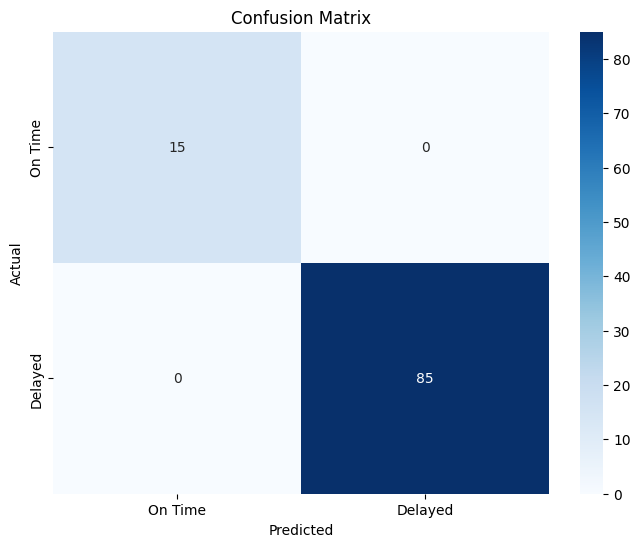


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        85

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [35]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)
class_report = classification_report(Y_test,y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

Step 8: Heatmap of Feature Correlations

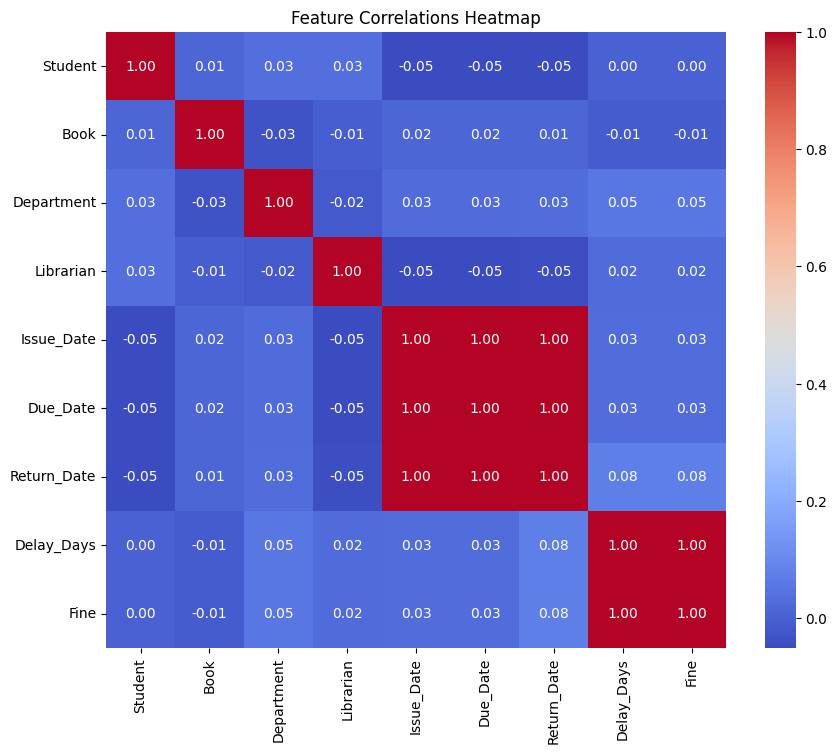

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=['Slip_Id']).corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlations Heatmap")
plt.show()

Step 9: Feature Importance

/tmp/ipython-input-3198483856.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')


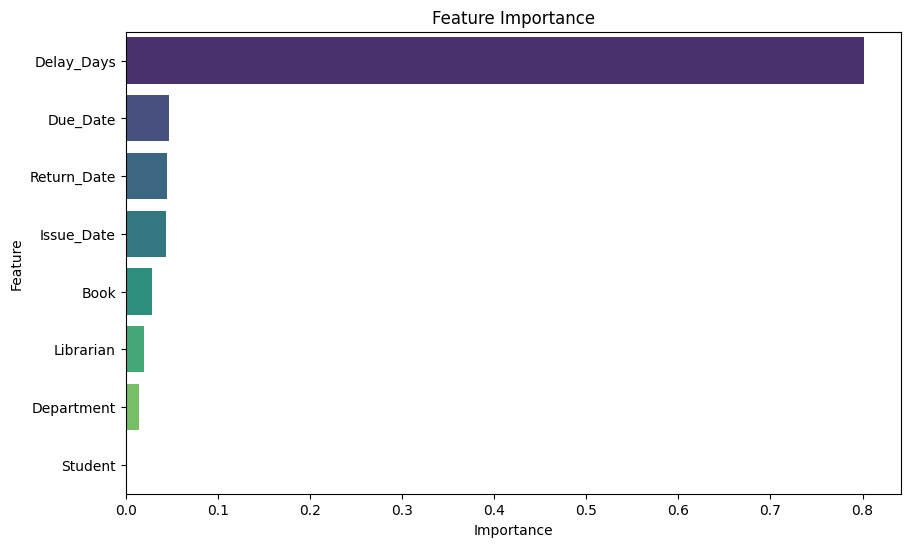

In [37]:
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')
plt.title("Feature Importance")
plt.show()